In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
DF = pd.read_csv('DF')
DF_SDG = pd.read_csv('DF_SDG_Lee')
DF_SDG2 = pd.read_csv('DF_SDG2')

In [4]:
unique_types_DF = DF['type'].unique()
unique_types_DF_SDG = DF_SDG['type'].unique()
print(unique_types_DF)
print(unique_types_DF_SDG)

['article' 'review' 'book-chapter' 'book' 'preprint' 'dissertation'
 'paratext' 'other' 'report' 'editorial']
['article' 'review' 'book-chapter' 'book' 'preprint' 'report']


**In line with the work of Lee and al(2015), we will apply a log transformation to the number of authors due to the fact that the Novelty has been log transformed. We will also create a vector representing this log_num_authors squared to study a polynamial relation ship  (U reversed) between the Novelty and num_authors. Moreover, since we're going to compare the citation metric to the commonness metric. We'll log-transform the citation variable, as was done in the Commonness metric building.**

In [5]:
#Number of authors
DF['log_num_authors'] = np.log(DF['num_authors'] + 1)
DF['log_num_authors_squared'] = DF['log_num_authors']**2

DF_SDG['log_num_authors_SDG'] = np.log(DF_SDG['num_authors'] + 1)
DF_SDG['log_num_authors_squared_SDG'] = DF_SDG['log_num_authors_SDG']**2

#Metric of citation
DF['log_num_citations'] = np.log(DF['num_citations'] + 1)
DF_SDG['log_num_citations_SDG'] = np.log(DF_SDG['num_citations'] + 1)

In [6]:
DF_SDG2['log_num_citations_SDG'] = np.log(DF_SDG2['num_citations'] + 1)
DF_SDG = pd.concat([DF_SDG, DF_SDG2], ignore_index=True)
DF_SDG = DF_SDG.drop_duplicates()

**Descriptive statistics:**

In [7]:
DF.describe()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations
count,2.527000e+03,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,5.110118e+07,2016.023744,611.91294,5.535417,-3.499209,0.563910,1.609754,3.006481,5.642044
std,2.929209e+07,4.261660,1410.29717,8.163186,1.882766,0.495997,0.644467,2.552159,1.225520
min,2.199100e+04,2007.000000,17.00000,0.000000,-12.340187,0.000000,0.000000,0.000000,2.890372
25%,2.555286e+07,2013.000000,107.00000,2.000000,-4.488933,0.000000,1.098612,1.206949,4.682131
50%,5.224592e+07,2017.000000,298.00000,4.000000,-3.227289,1.000000,1.609438,2.590290,5.700444
75%,7.685187e+07,2019.000000,677.00000,6.000000,-2.227209,1.000000,1.945910,3.786566,6.519147
max,9.991358e+07,2023.000000,29728.00000,100.000000,0.817186,1.000000,4.615121,21.299337,10.299878


In [8]:
DF_SDG.describe()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG
count,2.064000e+03,2064.000000,2064.000000,2064.000000,2064.000000,995.000000,2064.000000,2064.000000,2064.000000
mean,5.238994e+07,2018.549903,145.800388,5.125000,-3.642421,0.578894,1.546509,2.781316,4.373348
std,2.930960e+07,3.100268,685.053053,8.188691,1.762058,0.493985,0.624351,2.481067,0.853485
min,1.228150e+05,2007.000000,15.000000,0.000000,-11.799166,0.000000,0.000000,0.000000,2.772589
25%,2.655007e+07,2017.000000,43.000000,2.000000,-4.524213,0.000000,1.098612,1.206949,3.784190
50%,5.534589e+07,2019.000000,66.000000,3.000000,-3.352091,1.000000,1.386294,1.921812,4.204693
75%,7.753590e+07,2021.000000,124.000000,5.000000,-2.407430,1.000000,1.791759,3.210402,4.828314
max,9.980607e+07,2023.000000,23938.000000,100.000000,0.656780,1.000000,4.615121,21.299337,10.083264


**Let's look at the correlations between our variables:**

In [9]:
DF.corr()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations
PMID,1.000000,0.004193,0.022022,-0.000328,-0.027966,0.014033,-0.015626,-0.004670,-0.026606
year,0.004193,1.000000,-0.237062,0.067355,0.038540,-0.001280,0.098606,0.082681,-0.483523
num_citations,0.022022,-0.237062,1.000000,0.081276,0.019398,-0.022876,0.054411,0.091630,0.570627
num_authors,-0.000328,0.067355,0.081276,1.000000,0.038328,0.032758,0.772121,0.912487,0.131175
Novelty,-0.027966,0.038540,0.019398,0.038328,1.000000,-0.031218,0.052558,0.046871,0.084826
SDG_dummy,0.014033,-0.001280,-0.022876,0.032758,-0.031218,1.000000,0.068354,0.054622,-0.033938
log_num_authors,-0.015626,0.098606,0.054411,0.772121,0.052558,0.068354,1.000000,0.951496,0.143543
log_num_authors_squared,-0.004670,0.082681,0.091630,0.912487,0.046871,0.054622,0.951496,1.000000,0.163161
log_num_citations,-0.026606,-0.483523,0.570627,0.131175,0.084826,-0.033938,0.143543,0.163161,1.000000


        ->Week correlation between Commonness and log_num_authors, Commonness and log_num_authors_squared 

In [10]:
DF_SDG.corr()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG
PMID,1.000000,0.022187,-0.002369,-0.025104,0.008087,0.046525,-0.036664,-0.030799,-0.057888
year,0.022187,1.000000,-0.211266,0.037006,-0.027227,-0.006587,0.093967,0.069490,-0.457704
num_citations,-0.002369,-0.211266,1.000000,0.022895,0.055865,-0.019967,-0.013544,0.015961,0.426991
num_authors,-0.025104,0.037006,0.022895,1.000000,0.076247,0.049737,0.761508,0.904357,0.168189
Novelty,0.008087,-0.027227,0.055865,0.076247,1.000000,0.004095,0.151421,0.124758,0.247773
SDG_dummy,0.046525,-0.006587,-0.019967,0.049737,0.004095,1.000000,0.017414,0.029167,-0.016950
log_num_authors_SDG,-0.036664,0.093967,-0.013544,0.761508,0.151421,0.017414,1.000000,0.955007,0.170978
log_num_authors_squared_SDG,-0.030799,0.069490,0.015961,0.904357,0.124758,0.029167,0.955007,1.000000,0.187114
log_num_citations_SDG,-0.057888,-0.457704,0.426991,0.168189,0.247773,-0.016950,0.170978,0.187114,1.000000


        ->Correlation is more important between Commonness and log_num_authors, Commonness and log_num_authors_squared in the SDG table and closer to Lee and al(2015)'s results!

        NB: The correlation found by the latter was closer to 20%.

**Let's take a look at the distribution of Novelty and num_citations and their evolution over time:**

Distribution:

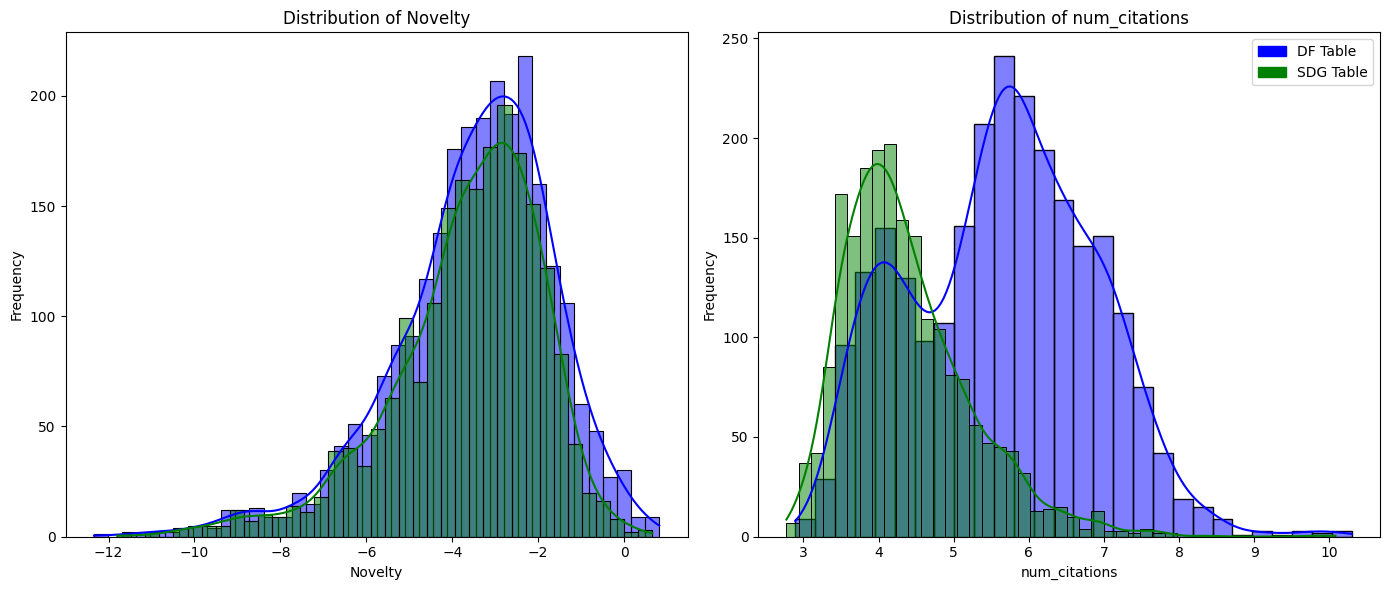

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(DF['Novelty'], kde=True, color='blue')
sns.histplot(DF_SDG['Novelty'], kde=True, color='green')
plt.xlabel('Novelty')
plt.ylabel('Frequency')
plt.title('Distribution of Novelty')

plt.subplot(1, 2, 2)
sns.histplot(DF['log_num_citations'], kde=True, color='blue')
sns.histplot(DF_SDG['log_num_citations_SDG'], kde=True, color='green')
plt.xlabel('num_citations')
plt.ylabel('Frequency')
plt.title('Distribution of num_citations')

blue_patch = mpatches.Patch(color='blue', label='DF Table')
green_patch = mpatches.Patch(color='green', label='SDG Table')

plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.tight_layout()
plt.show()

Number of observations by year:

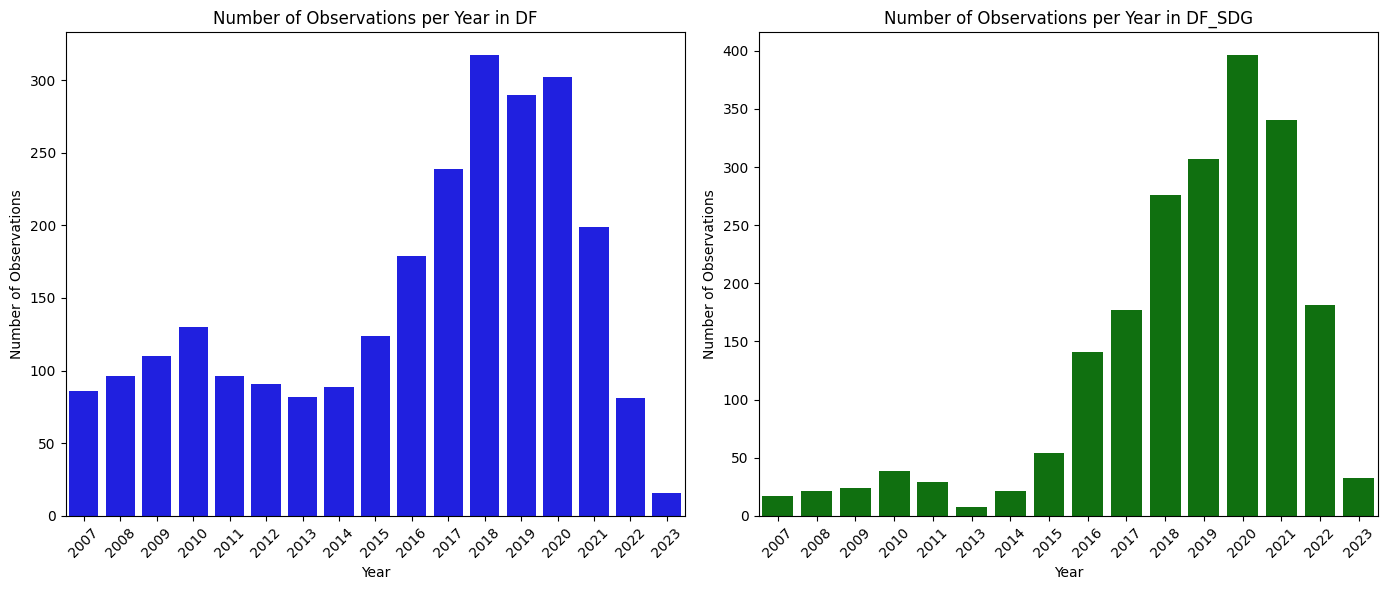

In [12]:
observations_per_year_DF = DF.groupby('year').size().reset_index(name='counts')

# Nombre d'observations par année dans DF_SDG
observations_per_year_SDG = DF_SDG.groupby('year').size().reset_index(name='counts')

# Création de la figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(14, 6))

# Premier graphique : Nombre d'observations par année dans DF
plt.subplot(1, 2, 1)
sns.barplot(x='year', y='counts', data=observations_per_year_DF, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Year in DF')
plt.xticks(rotation=45)

# Deuxième graphique : Nombre d'observations par année dans DF_SDG
plt.subplot(1, 2, 2)
sns.barplot(x='year', y='counts', data=observations_per_year_SDG, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Year in DF_SDG')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Evolution over time (annuel mean):

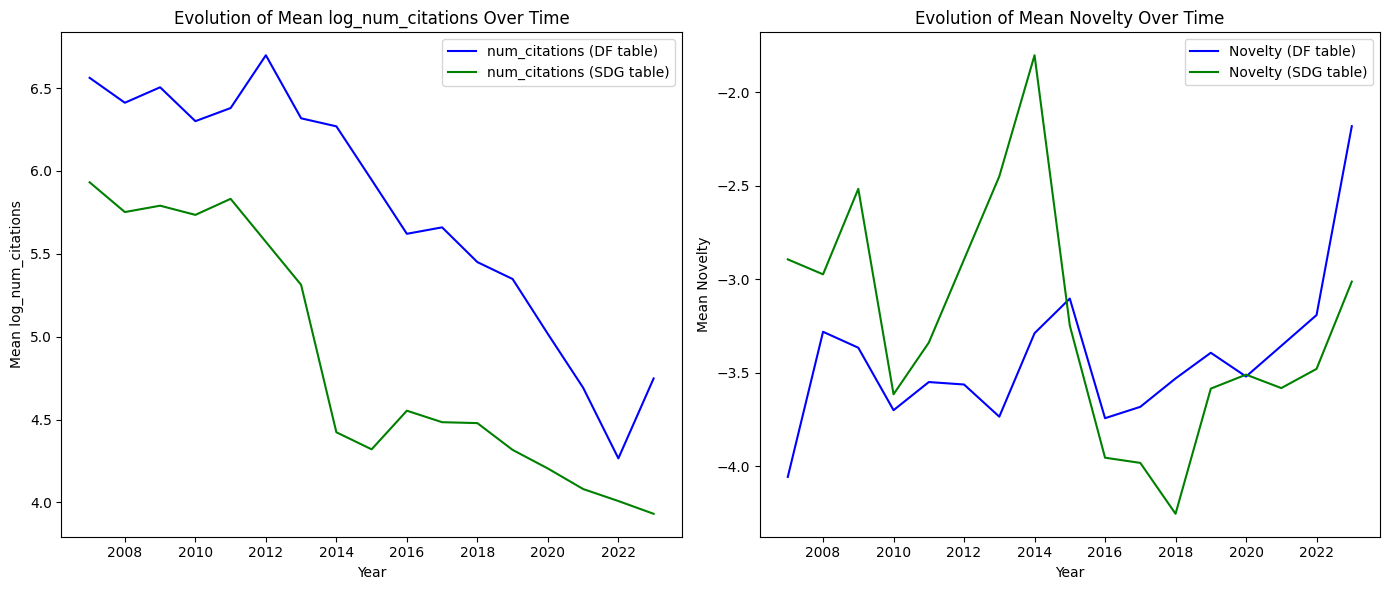

In [13]:
# Calcul des moyennes annuelles
mean_citations_per_year_DF = DF.groupby('year')['log_num_citations'].mean().reset_index()
mean_citations_per_year_SDG = DF_SDG.groupby('year')['log_num_citations_SDG'].mean().reset_index()
mean_Novelty_per_year_DF = DF.groupby('year')['Novelty'].mean().reset_index()
mean_Novelty_per_year_SDG = DF_SDG.groupby('year')['Novelty'].mean().reset_index()

# Création de la figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(14, 6))

# Premier graphique : Evolution du nombre moyen de citations pour DF et DF_SDG
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='log_num_citations', data=mean_citations_per_year_DF, color='blue', label='num_citations (DF table)')
sns.lineplot(x='year', y='log_num_citations_SDG', data=mean_citations_per_year_SDG, color='green', label='num_citations (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean log_num_citations')
plt.title('Evolution of Mean log_num_citations Over Time')
plt.legend()

# Deuxième graphique : Evolution du score moyen de Commonness pour DF et DF_SDG
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='Novelty', data=mean_Novelty_per_year_DF, color='blue', label='Novelty (DF table)')
sns.lineplot(x='year', y='Novelty', data=mean_Novelty_per_year_SDG, color='green', label='Novelty (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean Novelty')
plt.title('Evolution of Mean Novelty Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
Y_DF_nov = DF['Novelty']
Y_DF_cit = DF['log_num_citations']
X_DF = DF[['log_num_authors','log_num_authors_squared']]
X_DF = sm.add_constant(X_DF)

Y_SDG_nov = DF_SDG['Novelty']
Y_SDG_cit = DF_SDG['log_num_citations_SDG']
X_SDG = DF_SDG[['log_num_authors_SDG','log_num_authors_squared_SDG']]
X_SDG = sm.add_constant(X_SDG)

In [15]:
model_DF_nov = sm.OLS(Y_DF_nov, X_DF).fit(cov_type='HC3')
DF['predicted_DF_nov'] = model_DF_nov.predict(X_DF)

model_DF_cit = sm.OLS(Y_DF_cit, X_DF).fit(cov_type='HC3')
DF['predicted_DF_cit'] = model_DF_cit.predict(X_DF)

model_SDG_nov = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_nov'] = model_SDG_nov.predict(X_SDG)

model_SDG_cit = sm.OLS(Y_SDG_cit, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_cit'] = model_SDG_cit.predict(X_SDG)

In [16]:
model_DF_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Novelty   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.953
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0524
Time:                        19:17:32   Log-Likelihood:                -5180.5
No. Observations:                2527   AIC:                         1.037e+04
Df Residuals:                    2524   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8212      0.228    -16.745      0.000      -4.268      -3.374
log_num_authors             0.2457      0.228      1.079      0.280      -0.200       0.692
log_num_authors_squared    -0.0245      0.053     -0.463      0.643      -0.128       0.079
==============================================================================
Omnibus:                      302.158   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.638
Skew:                          -0.845   Prob(JB):                    2.33e-103
Kurtosis:                       4.279   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Not significant results in this table containing papers from several queries (for 2,527 obs.)

In [17]:
model_DF_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_num_citations   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.72
Date:                Sun, 26 May 2024   Prob (F-statistic):           4.63e-13
Time:                        19:17:32   Log-Likelihood:                -4063.1
No. Observations:                2527   AIC:                             8132.
Df Residuals:                    2524   BIC:                             8150.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.6151      0.144     38.950      0.000       5.333       5.898
log_num_authors            -0.2351      0.152     -1.545      0.122      -0.533       0.063
log_num_authors_squared     0.1348      0.038      3.539      0.000       0.060       0.210
==============================================================================
Omnibus:                       23.809   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.884
Skew:                           0.079   Prob(JB):                     0.000216
Kurtosis:                       2.632   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [18]:
model_SDG_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Novelty   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     24.77
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.35e-11
Time:                        19:17:32   Log-Likelihood:                -4068.7
No. Observations:                2064   AIC:                             8143.
Df Residuals:                    2061   BIC:                             8160.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.7982      0.209    -22.944      0.000      -5.208      -4.388
log_num_authors_SDG             1.0356      0.207      5.001      0.000       0.630       1.441
log_num_authors_squared_SDG    -0.1603      0.046     -3.514      0.000      -0.250      -0.071
==============================================================================
Omnibus:                      302.130   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.459
Skew:                          -0.978   Prob(JB):                    7.02e-108
Kurtosis:                       4.383   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Significant results in this table containing papers from SDG query (for 995 obs.)

In [19]:
model_SDG_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_num_citations_SDG   R-squared:                       0.036
Model:                               OLS   Adj. R-squared:                  0.035
Method:                    Least Squares   F-statistic:                     31.61
Date:                   Sun, 26 May 2024   Prob (F-statistic):           3.00e-14
Time:                           19:17:32   Log-Likelihood:                -2563.7
No. Observations:                   2064   AIC:                             5133.
Df Residuals:                       2061   BIC:                             5150.
Df Model:                              2                                         
Covariance Type:                     HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.2996      0.118     36.426      0.000       4.068       4.531
log_num_authors_SDG            -0.1199      0.124     -0.966      0.334      -0.363       0.123
log_num_authors_squared_SDG     0.0932      0.030      3.111      0.002       0.034       0.152
==============================================================================
Omnibus:                      476.917   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.351
Skew:                           1.217   Prob(JB):                    1.04e-275
Kurtosis:                       5.966   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

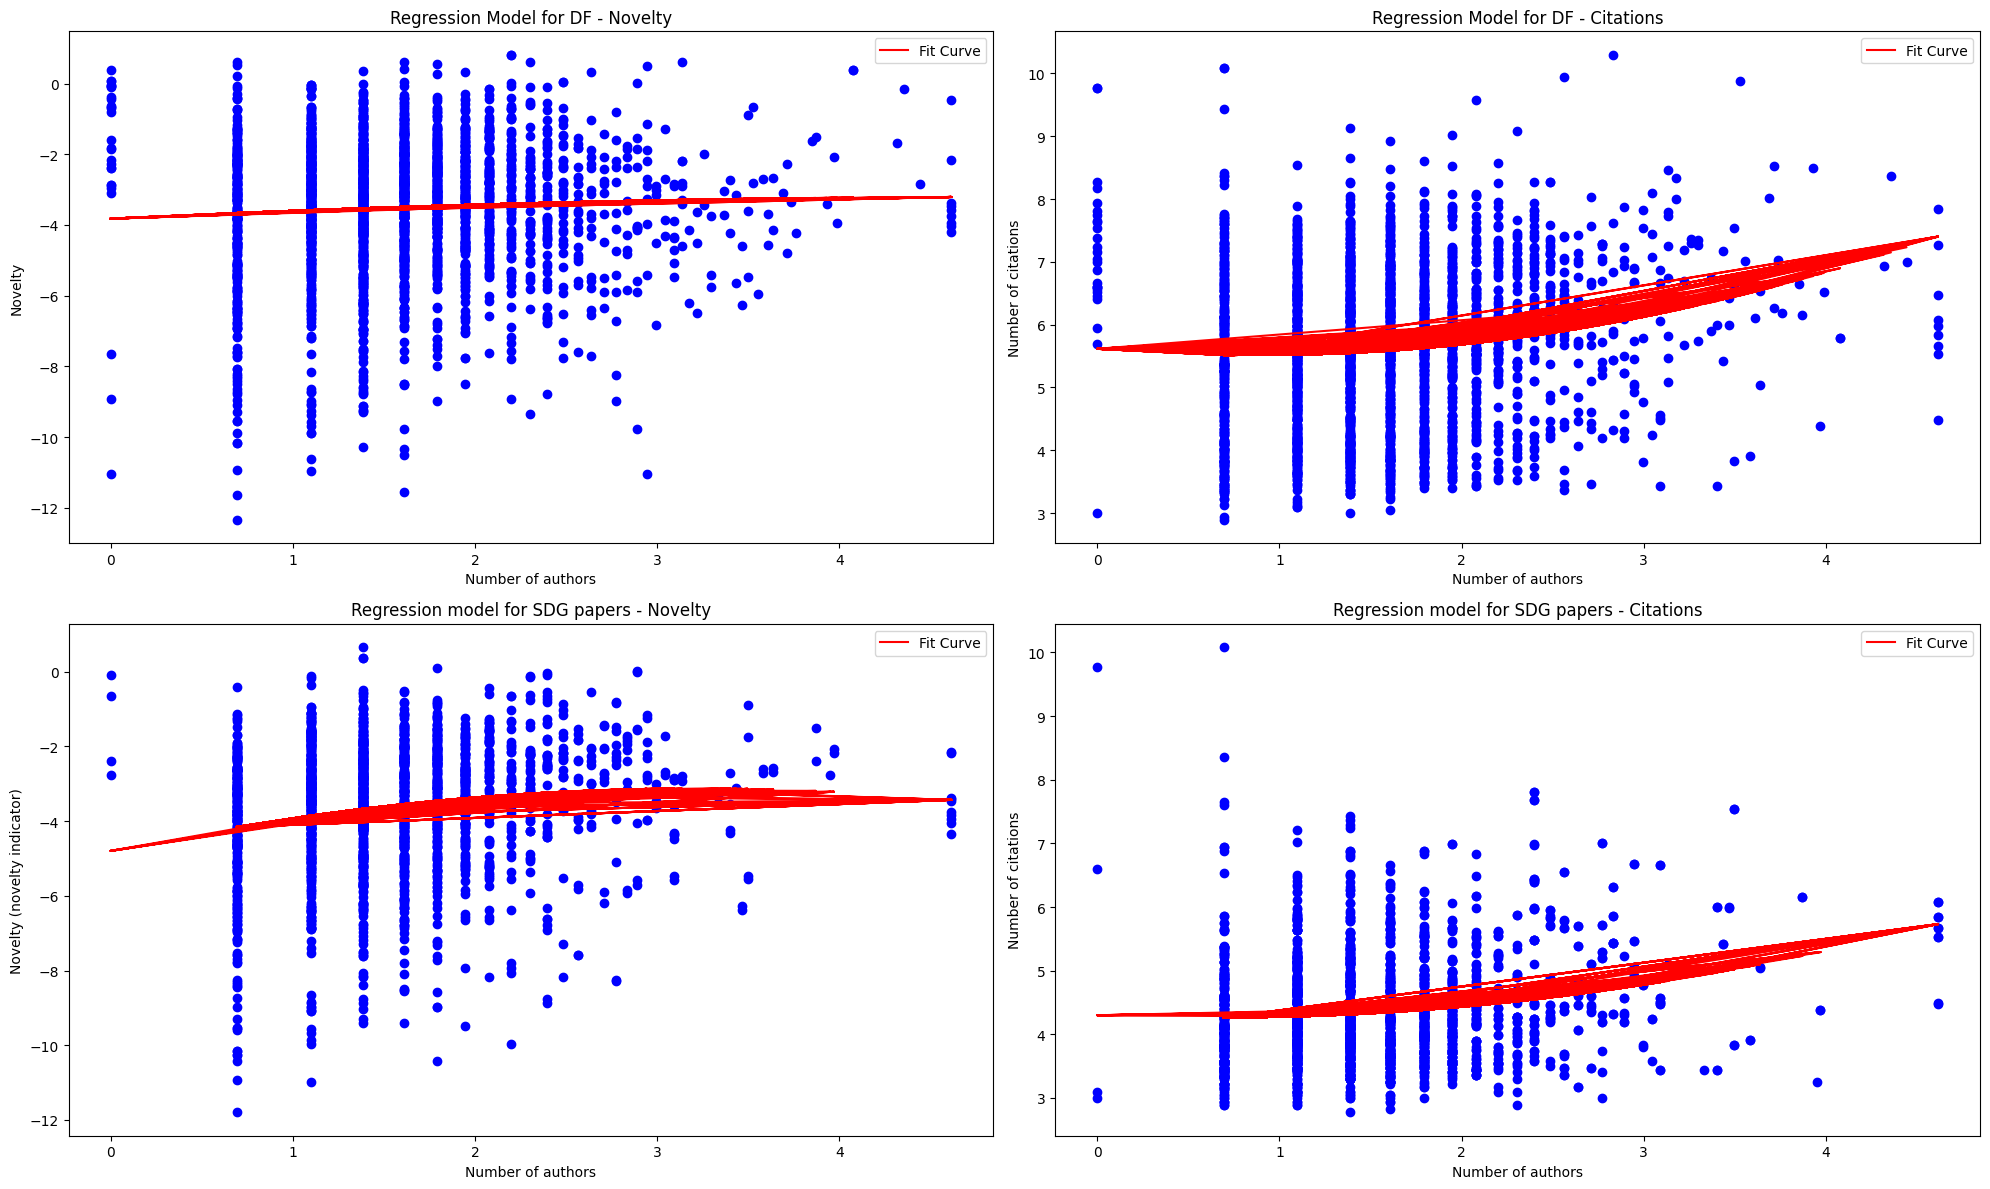

In [37]:
# Creating a figure with 4 subplots
plt.figure(figsize=(20, 12))

# First subplot: DF Novelty
plt.subplot(2, 2, 1)
plt.scatter(DF['log_num_authors'], DF['Novelty'], color='blue')
plt.plot(DF['log_num_authors'], DF['predicted_DF_nov'], color='red', label='Fit Curve')
plt.xlabel('Number of authors')
plt.ylabel('Novelty')
plt.title('Regression Model for DF - Novelty')
plt.legend()

# Second subplot: DF Citations
plt.subplot(2, 2, 2)
plt.scatter(DF['log_num_authors'], DF['log_num_citations'], color='blue')
plt.plot(DF['log_num_authors'], DF['predicted_DF_cit'], color='red', label='Fit Curve')
plt.xlabel('Number of authors')
plt.ylabel('Number of citations')
plt.title('Regression Model for DF - Citations')
plt.legend()

# Third subplot: SDG Novelty
plt.subplot(2, 2, 3)
plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Novelty'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='red', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Novelty (novelty indicator)')
plt.title('Regression model for SDG papers - Novelty')
plt.legend()

# Fourth subplot: SDG Citations
plt.subplot(2, 2, 4)
plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['log_num_citations_SDG'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_cit'], color='red', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Number of citations')
plt.title('Regression model for SDG papers - Citations')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
#Calculate the pairing that maximizes the Novelty function, number of authors
b0 = model_SDG_nov.params['const']
b1 = model_SDG_nov.params['log_num_authors_SDG']
b2 = model_SDG_nov.params['log_num_authors_squared_SDG']

log_num_authors_SDG_max = b1 / (-2 * b2)

Novelty_max = b0 + b1 * log_num_authors_SDG_max + b2 * log_num_authors_SDG_max**2

print(f'The corresponding maximum torque is ({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})')


The corresponding maximum torque is (3.2307, -3.1254)


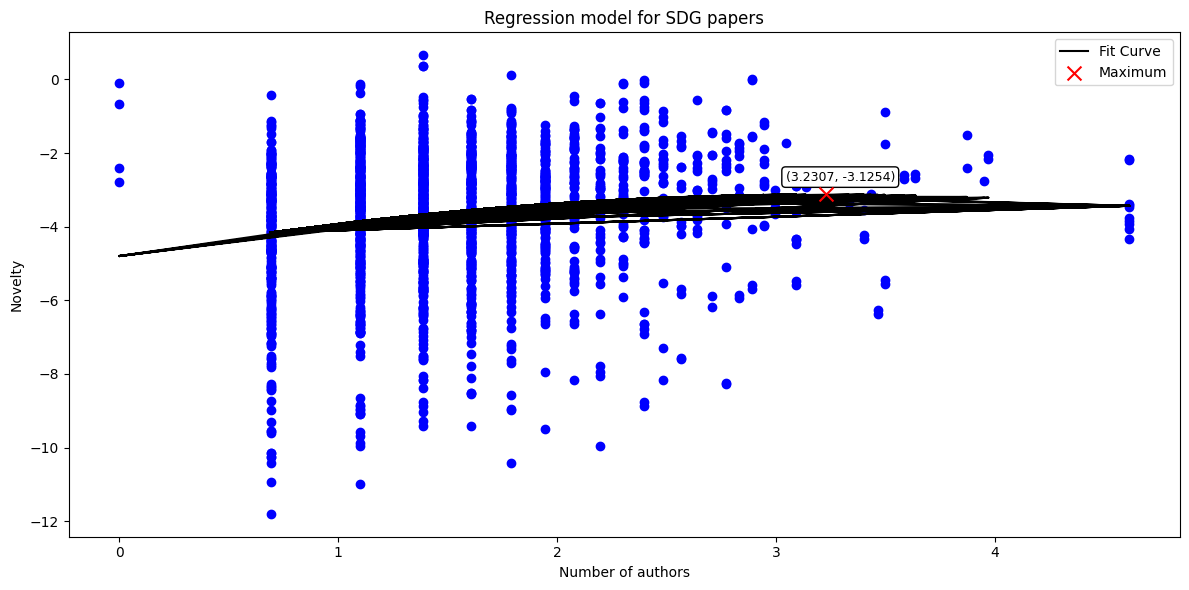

In [25]:
#Ploting to show polynomial relation between Novelty and number of authors (observations, fit curve and maximum)
plt.figure(figsize=(12, 6))

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Novelty'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='black', label='Fit Curve')
plt.scatter(log_num_authors_SDG_max, Novelty_max, color='red', s=100, marker='x', zorder=5, label='Maximum')

plt.annotate(f'({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})', 
             (log_num_authors_SDG_max, Novelty_max), 
             textcoords="offset points", 
             xytext=(10,10),  
             ha='center', 
             fontsize=9, 
             color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.xlabel("Number of authors")
plt.ylabel('Novelty')
plt.title('Regression model for SDG papers')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
DF_SDG.info

<bound method DataFrame.info of           PMID  year          type  num_citations  num_authors  \
0     32192440  2007       article          23938            1   
1     94080427  2007        review           2085            1   
2      9728790  2007  book-chapter            922            7   
3     34822541  2007       article            521            5   
4     25823952  2007       article            347            2   
...        ...   ...           ...            ...          ...   
2059  32282148  2023       article             23           13   
2060  30936776  2023       article             41            8   
2061  48860295  2023       article             41            4   
2062  28327940  2023       article             31            3   
2063  80605948  2023       article             29            6   

                                                authors  \
0                               ['Nasser M. Nasrabadi']   
1                                ['Sotiris Kotsiantis']  

In [27]:
unique_subfield_SDG = DF_SDG['subfield'].unique()
unique_subfield_SDG

array(['Computer science', 'Machine learning', 'Biology',
       'Support vector machine', 'Random forest', 'Interpretability',
       'Bed load', 'Algal bloom', 'Argumentation theory',
       'Reproducing kernel Hilbert space', 'Artificial intelligence',
       'Bullwhip effect', 'Sentiment analysis', 'CAPTCHA',
       'Brain–computer interface', 'Typhoon', 'Software metric',
       'Phishing', 'Land cover', 'Intrusion detection system',
       'Python (programming language)', 'Cart', 'Workbench', 'In silico',
       'Linear discriminant analysis', 'Ibis', 'Effector',
       'Single-nucleotide polymorphism', 'Centroid', 'Malware',
       'Stochastic gradient descent', 'Detector', 'Deep learning',
       'Gaussian process', 'Accrual', 'Accelerometer', 'Overfitting',
       'Credit card', 'Ternary operation', 'Imputation (statistics)',
       'Toolbox', 'Epileptic seizure', 'Attrition', 'Cluster analysis',
       'Authorship attribution', 'Feature selection',
       'Adversarial system'

In [28]:
#Manual retrieval of a list of subfields referring to digital technologies
Digital_technology_subfield = ['computer', 'machine learning', 'artificial intelligence', 'AI', 'deep learning',
            'data science', 'algorithm', 'neural network', 'internet', 'IoT', 'blockchain',
            'cryptocurrency', 'robotics', 'software', 'programming', 'digital', 'big data',
            'cybersecurity', 'information technology', 'ICT']

DF_SDG['digital_subfield_dum'] = DF_SDG['subfield'].apply(
    lambda x: 1 if any(keyword.lower() in x.lower() for keyword in Digital_technology_subfield) else 0
)

In [29]:
DF_SDG.corr()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG,predicted_SDG_nov,predicted_SDG_cit,digital_subfield_dum
PMID,1.000000,0.022187,-0.002369,-0.025104,0.008087,0.046525,-0.036664,-0.030799,-0.057888,-0.039280,-0.027138,0.012278
year,0.022187,1.000000,-0.211266,0.037006,-0.027227,-0.006587,0.093967,0.069490,-0.457704,0.113548,0.056007,-0.043763
num_citations,-0.002369,-0.211266,1.000000,0.022895,0.055865,-0.019967,-0.013544,0.015961,0.426991,-0.051777,0.029178,0.036969
num_authors,-0.025104,0.037006,0.022895,1.000000,0.076247,0.049737,0.761508,0.904357,0.168189,0.455070,0.943182,-0.070278
Novelty,0.008087,-0.027227,0.055865,0.076247,1.000000,0.004095,0.151421,0.124758,0.247773,0.165554,0.108579,0.104359
SDG_dummy,0.046525,-0.006587,-0.019967,0.049737,0.004095,1.000000,0.017414,0.029167,-0.016950,-0.001053,0.033720,-0.032910
log_num_authors_SDG,-0.036664,0.093967,-0.013544,0.761508,0.151421,0.017414,1.000000,0.955007,0.170978,0.914633,0.905054,-0.052987
log_num_authors_squared_SDG,-0.030799,0.069490,0.015961,0.904357,0.124758,0.029167,0.955007,1.000000,0.187114,0.753577,0.990469,-0.062413
log_num_citations_SDG,-0.057888,-0.457704,0.426991,0.168189,0.247773,-0.016950,0.170978,0.187114,1.000000,0.123900,0.188915,0.012622
predicted_SDG_nov,-0.039280,0.113548,-0.051777,0.455070,0.165554,-0.001053,0.914633,0.753577,0.123900,1.000000,0.655850,-0.032365


In [30]:
Y_SDG_nov = DF_SDG['Novelty']
X_SDG = DF_SDG[['log_num_authors_SDG','log_num_authors_squared_SDG', 'digital_subfield_dum']]
X_SDG = sm.add_constant(X_SDG)

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_nov2'] = model_SDG_nov2.predict(X_SDG)

model_SDG_nov2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Novelty   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     25.19
Date:                Sun, 26 May 2024   Prob (F-statistic):           5.28e-16
Time:                        19:17:35   Log-Likelihood:                -4055.8
No. Observations:                2064   AIC:                             8120.
Df Residuals:                    2060   BIC:                             8142.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.9407      0.209    -23.684      0.000      -5.350      -4.532
log_num_authors_SDG             1.0122      0.204      4.952      0.000       0.612       1.413
log_num_authors_squared_SDG    -0.1498      0.045     -3.321      0.001      -0.238      -0.061
digital_subfield_dum            0.4016      0.078      5.145      0.000       0.249       0.555
==============================================================================
Omnibus:                      303.285   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.598
Skew:                          -0.977   Prob(JB):                    5.38e-109
Kurtosis:                       4.406   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

**To be reviewed /!\ :**

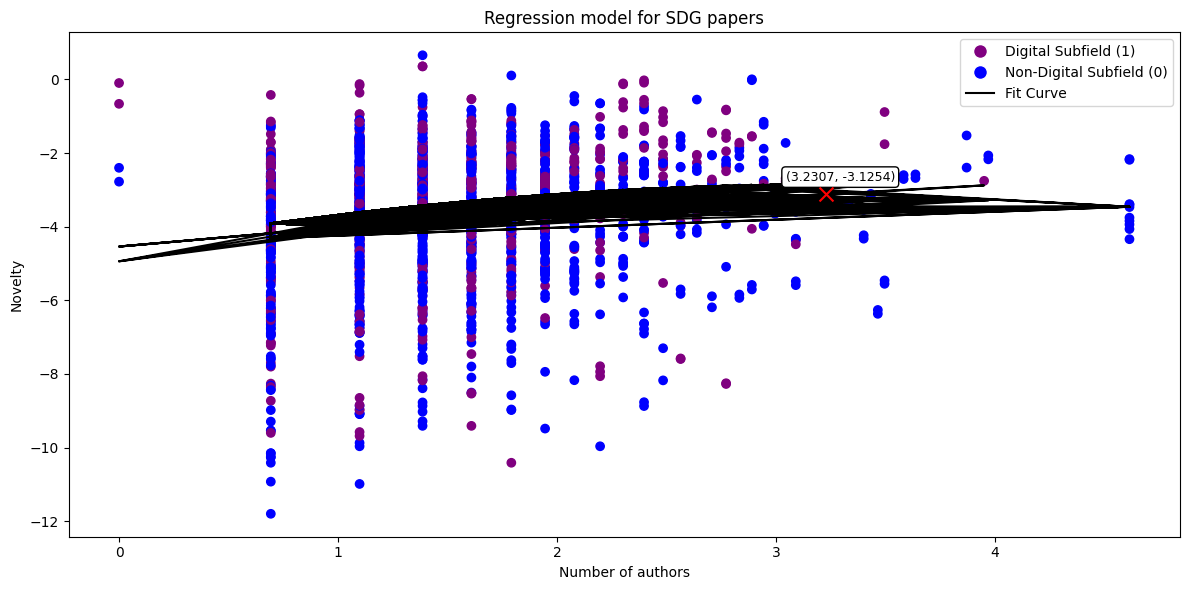

In [31]:
plt.figure(figsize=(12, 6))

colors = DF_SDG['digital_subfield_dum'].apply(lambda x: 'purple' if x == 1 else 'blue')

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Novelty'], c=colors)
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov2'], color='black', label='Fit Curve')
plt.scatter(log_num_authors_SDG_max, Novelty_max, color='red', s=100, marker='x', zorder=5, label='Maximum')

plt.annotate(f'({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})', 
             (log_num_authors_SDG_max, Novelty_max), 
             textcoords="offset points", 
             xytext=(10,10),  
             ha='center', 
             fontsize=9, 
             color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.xlabel("Number of authors")
plt.ylabel('Novelty')
plt.title('Regression model for SDG papers')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Digital Subfield (1)', 
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Non-Digital Subfield (0)', 
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='black', label='Fit Curve')]

plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [32]:
b0 = model_SDG_nov2.params['const']
b1 = model_SDG_nov2.params['log_num_authors_SDG']
b2 = model_SDG_nov2.params['log_num_authors_squared_SDG']

log_num_authors_SDG_max = b1 / (-2 * b2)

Novelty_max = b0 + b1 * log_num_authors_SDG_max + b2 * log_num_authors_SDG_max**2

print(f'The corresponding maximum torque is ({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})')

The corresponding maximum torque is (3.3792, -3.2305)


Significant results showing the positive effect of digital technologies on novelty. 
We also observe that integrating the digital_subfield_dum will slightly increase the number of authors needed to increase the potential novelty impact (3,2307 -> 3.3792).	